In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [46]:
data = pd.read_csv('data_evaluacion.csv')

In [47]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [49]:
data.describe()

,39,77516,13,2174,0,40
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,1.896664e+05,10.078029,1079.045208,87.504105,40.422391
std,13.710650,1.056039e+05,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [50]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
                'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 
                'income']

In [51]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [52]:
#COdificacion de variables categoricas

In [53]:
le = LabelEncoder()
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                    'race', 'sex', 'native_country', 'income']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [54]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop('income', axis=1)
y = data['income']

In [55]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba para verificar
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39072, 14), (9769, 14), (39072,), (9769,))

In [57]:
# Normalización de características
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [58]:
# Lista de valores de k para probar
k_values = range(1, 31)

In [59]:
# Lista para almacenar los promedios de los puntajes de validación cruzada
cross_val_scores = []

In [60]:
# Aplicar k-NN con diferentes valores de k y almacenar el promedio de los puntajes de validación cruzada
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_normalized, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

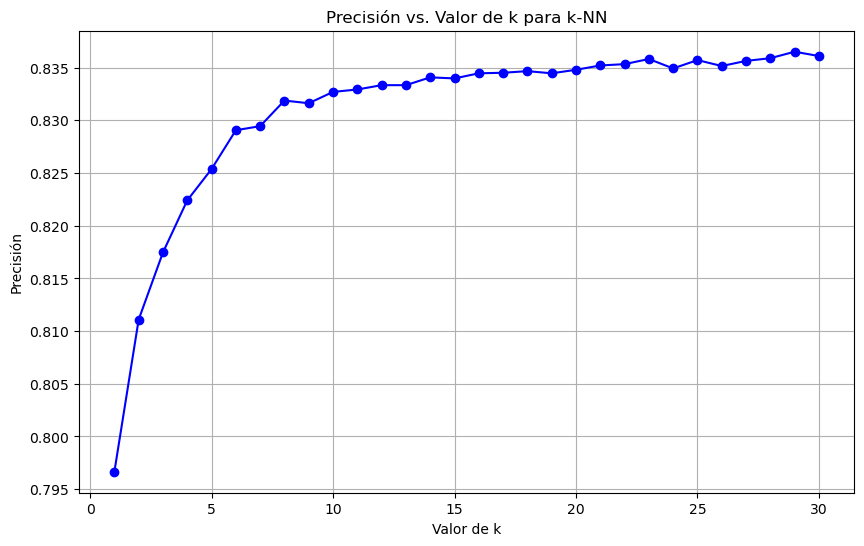

In [61]:
# Graficar los resultados para ver visualmente el mejor k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Precisión vs. Valor de k para k-NN')
plt.grid(True)
plt.show()

In [44]:
# Determinar el mejor k y mostrarlo
best_k = k_values[cross_val_scores.index(max(cross_val_scores))]
print("El mejor valor de k es:", best_k)

El mejor valor de k es: 29
